In [1]:
import pyodbc 
import pandas as pd
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=cocomel;"
                      "Database=FAS_OAR_DEV;"
                      "Trusted_Connection=yes;")

In [2]:
df = pd.read_sql_query('select Id, FPDS_Description_of_Requirement,Description_of_Deliverable, L2, L3 from FAS_OAR_DEV_STAGE3_POC.dbo.GovWide_ITC_Master_data_POC', cnxn)
df

,Id,FPDS_Description_of_Requirement,Description_of_Deliverable,L2,L3
0,2458,None,VLA ENTERPRISE 0365 DODE1 FOR SA SHRDSVR SUBS ...,Hardware,None
1,2459,None,Shipping,Hardware,None
2,2460,None,English F Class OriginPro 2018 Permanent Multi...,Hardware,None
3,2461,None,23.6 Widescreen Privacy Screen (16:9) Aspect R...,Services,None
4,2462,None,Mobile Precision 7530 BASE,Hardware,End User
...,...,...,...,...,...
1776789,1776513,MODIFICATION TO EXERCISE OPTION 1 OF THE DEFEN...,None,Services,None
1776790,1776514,IGF::OT::IGF NXEV002372EBM,None,Services,Inherently Governmental Functions
1776791,1776515,IGF::OT::IGF NXEV000833EBM,None,Services,Inherently Governmental Functions
1776792,1776517,PKG-CCRP : FIBERPLEX,None,Hardware,None


In [3]:
df.drop(["Description_of_Deliverable"], axis = 1, inplace = True) 
df.drop(["L3"], axis = 1, inplace = True) 
df

,Id,FPDS_Description_of_Requirement,L2
0,2458,None,Hardware
1,2459,None,Hardware
2,2460,None,Hardware
3,2461,None,Services
4,2462,None,Hardware
...,...,...,...
1776789,1776513,MODIFICATION TO EXERCISE OPTION 1 OF THE DEFEN...,Services
1776790,1776514,IGF::OT::IGF NXEV002372EBM,Services
1776791,1776515,IGF::OT::IGF NXEV000833EBM,Services
1776792,1776517,PKG-CCRP : FIBERPLEX,Hardware


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776794 entries, 0 to 1776793
Data columns (total 3 columns):
Id                                 int64
FPDS_Description_of_Requirement    object
L2                                 object
dtypes: int64(1), object(2)
memory usage: 40.7+ MB


In [5]:
df = df.dropna() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889140 entries, 845267 to 1776793
Data columns (total 3 columns):
Id                                 889140 non-null int64
FPDS_Description_of_Requirement    889140 non-null object
L2                                 889140 non-null object
dtypes: int64(1), object(2)
memory usage: 27.1+ MB


In [6]:
###Note - Had to drop about 1 million rows due to lack of information 

In [7]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

!pip install wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [8]:
text = " ".join(FPDS_Description_of_Requirement for FPDS_Description_of_Requirement in df.FPDS_Description_of_Requirement)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 55468589 words in the combination of all review.


In [9]:
wordcloud = WordCloud().generate(text)

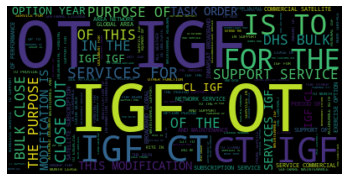

In [10]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
wordcloud.to_file("images/fpdsDescriptionofRequirement.png")

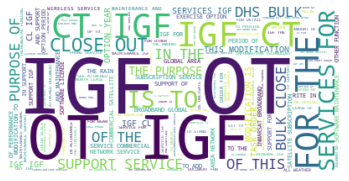

In [12]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Null", "N/A"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
wordcloud.to_file("images/fpdsDescriptionofRequirementnostopwords.png")

In [14]:
from io import StringIO

In [15]:
col = ['L2', 'FPDS_Description_of_Requirement']
df = df[col]
df = df[pd.notnull(df['FPDS_Description_of_Requirement'])]
df = df[pd.notnull(df['L2'])]

In [16]:
df.columns = ['L2','FPDS_Description_of_Requirement']

In [17]:
df['category_id']=df['L2'].factorize()[0]
category_id_df = df[['L2','category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id','L2']].values)
df.head()

,L2,FPDS_Description_of_Requirement,category_id
845267,Services,IGF::OT::IGF - OTHER FUNCTIONS,0
845270,Hardware,FAST FUNCTIONALITY DEVELOPMENT,1
845271,Services,THIRD AWARD TERM - LOT VIII,0
845272,Services,IGF::CT::IGF,0
845275,Services,BASE YEAR RENEWAL,0


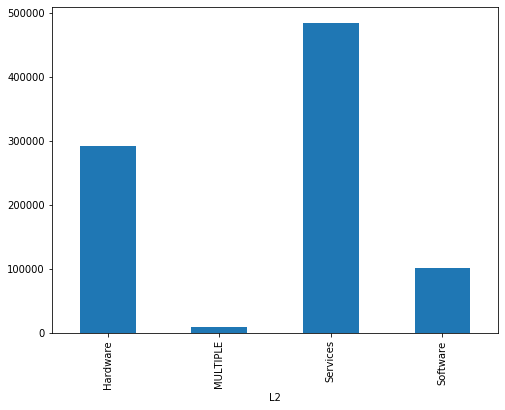

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('L2').FPDS_Description_of_Requirement.count().plot.bar(ylim=0)
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [21]:
features = tfidf.fit_transform(df.FPDS_Description_of_Requirement)##.toarray()
labels = df.category_id
features.shape

(889140, 178311)

In [22]:
from sklearn.feature_selection import chi2
import numpy as np

In [23]:
N = 2 
for L2, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(L2))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Hardware':
  . Most correlated unigrams:
. ot
. igf
  . Most correlated bigrams:
. ot igf
. igf ot
# 'MULTIPLE':
  . Most correlated unigrams:
. phone
. cell
  . Most correlated bigrams:
. phone service
. cell phone
# 'Services':
  . Most correlated unigrams:
. ot
. igf
  . Most correlated bigrams:
. ot igf
. igf ot
# 'Software':
  . Most correlated unigrams:
. license
. software
  . Most correlated bigrams:
. software license
. adp software


C:\Users\melco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\melco\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


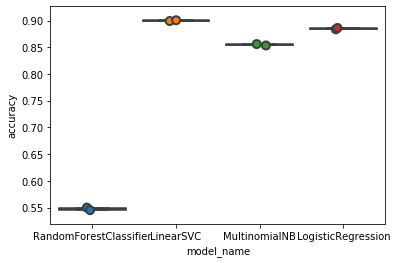

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),]
CV = 2
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [25]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.899872
LogisticRegression        0.884900
MultinomialNB             0.854710
RandomForestClassifier    0.547633
Name: accuracy, dtype: float64

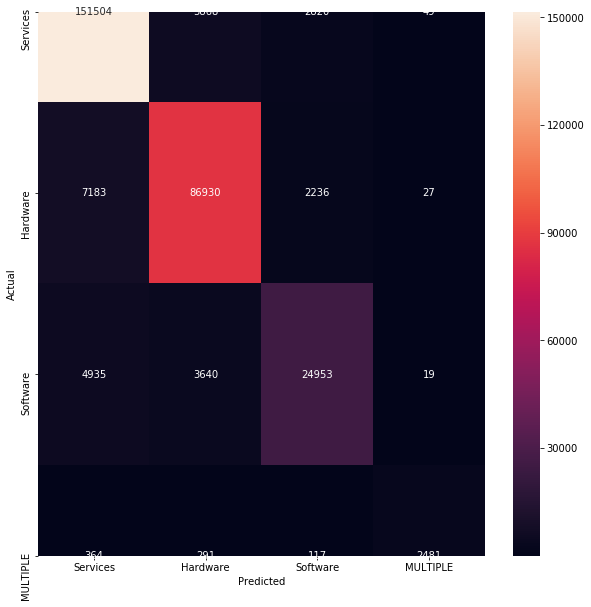

In [26]:
from sklearn.model_selection import train_test_split
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.L2.values, yticklabels=category_id_df.L2.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['L2', 'FPDS_Description_of_Requirement']])
    print('')


'Hardware' predicted as 'Services' : 7183 examples.


,L2,FPDS_Description_of_Requirement
1662955,Hardware,CAM2 2019 ARM 3 DAY ONSITE TRAINING
1538387,Hardware,ACCESS CONTROL SYSTEM FOR USPFO
1012363,Hardware,MLP1-CAP EXERCISE OY4
1313069,Hardware,MEA GFE
1384104,Hardware,MAINSTREAMS
...,...,...
1081209,Hardware,SMX750-NMC
1426332,Hardware,MONTHLY MONITORING OF TELEMATICS DEVICES FOR F...
1400675,Hardware,AUTOMATIC IDENTIFICATION TECHNOLOGY
1256845,Hardware,THE PURPOSE OF THE DELIVERY/TASK ORDER IS TO P...



'Software' predicted as 'Services' : 4935 examples.


,L2,FPDS_Description_of_Requirement
890791,Software,MOBILE CELLULAR TABLET
1146278,Software,THE PURPOSE OF THIS MODIFICATION TO REALIGN FU...
1634553,Software,"IGF::CL,CT::IGF THE PURPOSE OF THIS PURCHASE R..."
1506015,Software,OY1 ANNUAL SERVICE AGREEMENT
1543222,Software,CLOSEOUT
...,...,...
1420994,Software,EASY LOBBY BASE AND FOUR OPTIONS
1635558,Software,DEOBLIGATION
1476187,Software,LEXIS/NEXIS SUBSCRIPTION (LIBRARY)
1203024,Software,IPSNS3200ARMAG



'MULTIPLE' predicted as 'Services' : 364 examples.


,L2,FPDS_Description_of_Requirement
1519000,MULTIPLE,IGF::OT::IGF = OTHER FUNCTIONS - SATELLITE AIS...
1071627,MULTIPLE,CABLE SERVICE TO FCC PETERSBURG- LOW/MEDIUM/CA...
969247,MULTIPLE,CABLE SERVICES FOR W/D/TN. IGF::CT::IGF
1706858,MULTIPLE,"PERFORMANCE WORK STATEMENT (PWS), FOR THE ARMY..."
934203,MULTIPLE,IGF::CL::IGF DEPARTMENT OF VETERANS AFFAIRS (V...
...,...,...
1382980,MULTIPLE,"DATABASE ADMIN, DATA TOOLS AND O&MMODIFICATION..."
1637797,MULTIPLE,NETL VIDEO TELECONFERENCE ROOMS MAINTENANCE SE...
965696,MULTIPLE,IGF::CL::IGF IT GOVERNANCE SUPPORT PROVIDES SO...
913060,MULTIPLE,IGF::OT::IGF TAIWAN NAVY (TN) MARITIME MISSION...



'Services' predicted as 'Hardware' : 5868 examples.


,L2,FPDS_Description_of_Requirement
1249417,Services,"ADMIN MOD TO CHANGE CLIN 0006 POP, AND CLIN'S ..."
1605062,Services,CDW-G PURCHASE OF OTTERBOX DEFENDER'S AND APPL...
1106977,Services,THE PURPOSE OF THIS MODIFICATION IS TO ADD THE...
1060160,Services,"IN ACCORDANCE WITH FAR 4.804-1, THIS MODIFICAT..."
899686,Services,EQUIPMENT REPAIR
...,...,...
1568041,Services,THIS PROCUREMENT IS FOR BRANDNAME VERITAS CLEA...
1255982,Services,THIS PURCHASE ORDER PROVIDES ACCESS TO THE MAX...
1458613,Services,DHS BULK CLOSE OUT
1133343,Services,"FCI SANDSTONE, CCTV SECURITY SYSTEM COMPONENT ..."




'Software' predicted as 'Hardware' : 3640 examples.


,L2,FPDS_Description_of_Requirement
1123135,Software,PROCURE CISCO SOFTWARE FOR DC2 NET.
1162276,Software,DHS BULK CLOSE OUT
974020,Software,DHS BULK CLOSE OUT
1118695,Software,F5 BIG IP AND CHECKPOINT SW
1388149,Software,DHS BULK CLOSE OUT
...,...,...
944169,Software,"NON-ACAT, AFLCMC/LPA, IBM SWEAP LICENSES (ESI)"
1098785,Software,S2-17-04 (P-17-04) ALERT HARDWARE FOR DALLAS (...
1707796,Software,SUPER POWER USER NOTEBOOK W/CAM2 MEASURE
998702,Software,DHS BULK CLOSE OUT



'MULTIPLE' predicted as 'Hardware' : 291 examples.


,L2,FPDS_Description_of_Requirement
1234326,MULTIPLE,AUDIO VISUAL MAINTENANCE SUPPORT
1757710,MULTIPLE,PURCHASE OF NEW VERSIONONE LICENSES. NECESSARY...
987756,MULTIPLE,VIDEO TELECONFERENCING ENGINEER SUPPORT SERVICES
1214596,MULTIPLE,DELL POWEREDGE SERVERS AND EMC SWITCHES WITH A...
1536152,MULTIPLE,"CL,CT::CT,CL HARDWARE AND SOFTWARE SUPPORT FOR..."
...,...,...
1204777,MULTIPLE,"THE IOWA NATIONAL GUARD USES 2, F5 SERVERS TO ..."
1251846,MULTIPLE,IGF::CL::IGF TO PROCURE UPS DEVICES FOR USAID ...
975675,MULTIPLE,THE PURPOSE OF THIS ADMINISTRATIVE MODIFICATIO...
1092343,MULTIPLE,JMPS MISSION LAPTOP COMPUTERS



'Services' predicted as 'Software' : 2820 examples.


,L2,FPDS_Description_of_Requirement
1591572,Services,SNAGIT LICENSE UPGRADE AND ONE YEAR ASSOCIATED...
1505010,Services,CLOSEOUT MODIFICATION
1377510,Services,PS-SDSA - VMWARE PRO SVCS
1499581,Services,ANNUAL MAINTENANCE RENEWAL FOR ACCUTRAC SOFTWA...
1279430,Services,FORTICARE FORTINET SOFTWARE MAINTENANCE LICENSES.
...,...,...
1695207,Services,WEBCARL DATABASE
1006324,Services,ANNUAL SUBSCRIPTION STATDX
1452052,Services,CITRIX SOFTWARE ANNUAL RENEWAL FY19
1600913,Services,SE PROGRAM SOFTWARE SUPPORT



'Hardware' predicted as 'Software' : 2236 examples.


,L2,FPDS_Description_of_Requirement
1187545,Hardware,ANNUAL SOFTWARE MAINTENANCE SAS PCJMP FOR 50 U...
1666908,Hardware,VERITAS NETBACKUP MAINTENANCE RENEWAL
1155066,Hardware,PART# 7009111-CS-ES
1049646,Hardware,FY18 SYMANTEC ENDPOINT ENCRYPTION POWERED BY O...
1548452,Hardware,OXYGEN FORENSIC DETECTIVE SOFTWARE LICENSES&SU...
...,...,...
1509925,Hardware,FORCEPOINT HIGH SPEED GUARD
1054015,Hardware,ENCRYPTION FOR NON-WINDOWS DEVICES RENEWAL SOF...
1324081,Hardware,HP WEBINSPECT LICENSE RENEWAL. UNILATERAL CLOS...
1718707,Hardware,PRO PG_NOTEBOOKCOMPUTERS




'MULTIPLE' predicted as 'Software' : 117 examples.


,L2,FPDS_Description_of_Requirement
991872,MULTIPLE,OPEN TEXT/RECORDS MANAGEMENT MAILROOM SUPPORT ...
1138240,MULTIPLE,THE PURPOSE OF THIS DELIVERY ORDER IS TO PROCU...
1041548,MULTIPLE,47PF0018F0869 - METASYS CENTRALIZED ADS SOFTWA...
1342971,MULTIPLE,LINUX SOFTWARE TRAINING SUBSCRIPTION
1203493,MULTIPLE,"VMWARE, INC. IS A SUBSIDIARY OF DELL TECHNOLOG..."
...,...,...
1385563,MULTIPLE,MCAFEE ENTERPRISE SECURITY MANAGER (ESM) IS A ...
1209775,MULTIPLE,RENEWAL OF SOLARWINDS NETWORK MONITORING SOFTW...
1284451,MULTIPLE,IGF::OT::IGF TASK ORDER ISSUED OFF OF NETCENTS...
1414447,MULTIPLE,MICRO FOCUS SUPPORT SERVICES (SERENA)



'Services' predicted as 'MULTIPLE' : 49 examples.


,L2,FPDS_Description_of_Requirement
954239,Services,REQUIREMENT IS FOR INTERNATIONAL BUSINESS MACH...
1502173,Services,USASAC CABLE SERVICE
1743550,Services,IBM SOFTWARE MAINTENANCE AND SUPPORT. THE PURP...
1162999,Services,STANDARD AND EXTENDED CABLE SERVICES
1545213,Services,PR6961512_DEA_HANGAR CABLE AND INTERNET SERVICE
1035303,Services,IRS OGN REDUNDANT INTERNET SERVICE PROVIDER MO...
1478345,Services,SIPR NETWORK INFRASTRUCTURE UPGRADE
1572249,Services,PR6961512_DEA_HANGAR CABLE AND INTERNET SERVICE
1627239,Services,N6274218P3501 CABLE TV AND INTERNET SERVICES -...
1556406,Services,IGF::OT::IGF CELLCO PARTNERSHIP DBA VERIZON...



'Hardware' predicted as 'MULTIPLE' : 27 examples.


,L2,FPDS_Description_of_Requirement
1388858,Hardware,GHJ HP MAINTENANCE RENEWAL PR5884302 IS FOR ...
1458487,Hardware,IGF::OT::IGFCELL PHONE SERVICE FOR FORCECOM A...
1246959,Hardware,IGF::OT::IGF FY 2017 CELL PHONE AND SERVICE
1660137,Hardware,IGF::OT::IGF REPAIR OF THE DATA TRANSFER UNIT ...
1116557,Hardware,HARDWARE AND SOFTWARE MAINTENANCE SUPPORT FOR ...
1645662,Hardware,ENGINEER'S TOOLSET
1203817,Hardware,THE AIT-V MA IDIQ CONTRACT VEHICLE PROVIDES AN...
1371473,Hardware,IT INFRASTRUCTURE SUPPORT
1587719,Hardware,IGF::OT::IGF IT INFRASTRUCTURE SUPPORT
1272389,Hardware,BABATUNDE AKINTUNDE RENEWAL CHANGE AUDITOR MA...



'Software' predicted as 'MULTIPLE' : 19 examples.


,L2,FPDS_Description_of_Requirement
1446381,Software,IGF::OT::IGFANNUAL IBM SOFTWARE MAINTENANCE IN...
1679279,Software,OMEGA-WINDOWS XP UPGRADE
1739053,Software,THE PURPOSE OF THIS MODIFICATION P00016 IS TO ...
1413340,Software,MODIFICATION TO SETTLE COSTS FOR PLANNED ONSIT...
1394919,Software,IGF::OT::IGF INSCOM WINDOWS 10 HARDWARE PURCHA...
1121744,Software,CA MONITORING TOOLSET UPGRADE
1628258,Software,FUNDING OPTION RENEWAL FOR SUBSCRIPTION FOR IN...
1103131,Software,"""OTHER FUNCTION"" IGF::OT::IGF MAINTENANCE RENE..."
1397311,Software,"""OTHER FUNCTION"" IGF::OT::IGF MAINTENANCE RENE..."
1261512,Software,IGF::OT::IGF THIS ORDER IS BEING PLACED UNDER ...


In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['L2'].unique()))

              precision    recall  f1-score   support

    Services       0.92      0.95      0.93    160241
    Hardware       0.90      0.90      0.90     96376
    Software       0.83      0.74      0.78     33547
    MULTIPLE       0.96      0.76      0.85      3253

    accuracy                           0.91    293417
   macro avg       0.90      0.84      0.87    293417
weighted avg       0.91      0.91      0.91    293417



In [29]:
labels

845267     0
845270     1
845271     0
845272     0
845275     0
          ..
1776789    0
1776790    0
1776791    0
1776792    1
1776793    0
Name: category_id, Length: 889140, dtype: int64

In [30]:
df['category_id'] = labels
df.head()

,L2,FPDS_Description_of_Requirement,category_id
845267,Services,IGF::OT::IGF - OTHER FUNCTIONS,0
845270,Hardware,FAST FUNCTIONALITY DEVELOPMENT,1
845271,Services,THIRD AWARD TERM - LOT VIII,0
845272,Services,IGF::CT::IGF,0
845275,Services,BASE YEAR RENEWAL,0


In [31]:
df['predicted'] = labels
df.head()

,L2,FPDS_Description_of_Requirement,category_id,predicted
845267,Services,IGF::OT::IGF - OTHER FUNCTIONS,0,0
845270,Hardware,FAST FUNCTIONALITY DEVELOPMENT,1,1
845271,Services,THIRD AWARD TERM - LOT VIII,0,0
845272,Services,IGF::CT::IGF,0,0
845275,Services,BASE YEAR RENEWAL,0,0


In [32]:
df.to_csv("C:/Users/melco/Desktop/ML/ITCMasterClassify.csv")